In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/tansy/Ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 레이블(Outcome) 데이터 확인

Text(0.5, 1.0, 'OutCome')

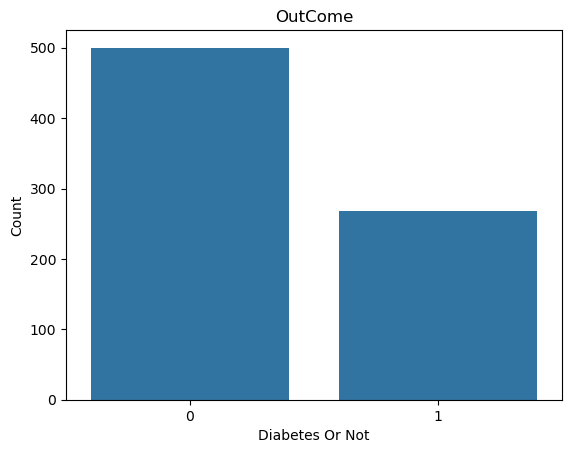

In [5]:
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes Or Not") 
plt.ylabel("Count")
plt.title("OutCome") 

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## 결측치 확인 및 제거 

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 컬럼별 상관관계 분석

C:\Users\tansy\AppData\Local\Temp\ipykernel_24852\4164180308.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'], kde = True, hist = False, ax=ax1)
C:\Users\tansy\AppData\Local\Temp\ipykernel_24852\4164180308.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gluc

<Axes: xlabel='Glucose', ylabel='Density'>

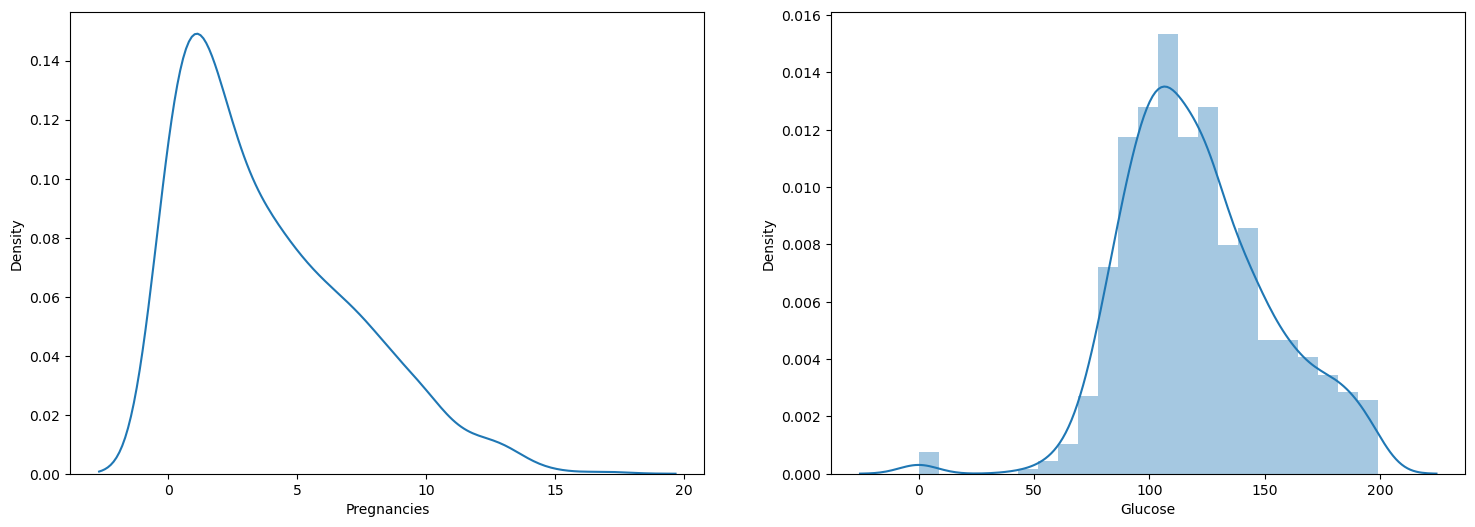

In [10]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Pregnancies'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Glucose'], ax=ax2)


Text(0, 0.5, 'Glucose')

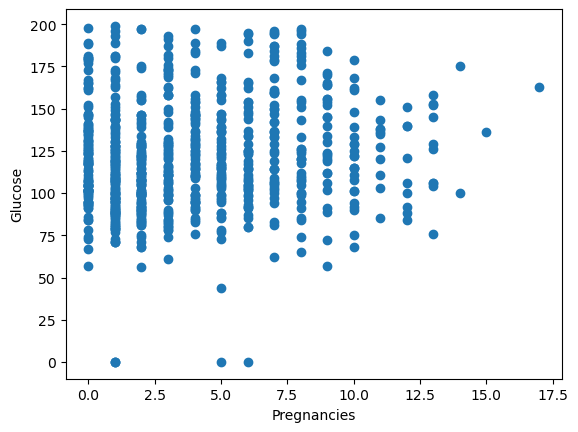

In [11]:
# 두 변수 간 산점도 
plt.scatter(df['Pregnancies'], df['Glucose'])
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')

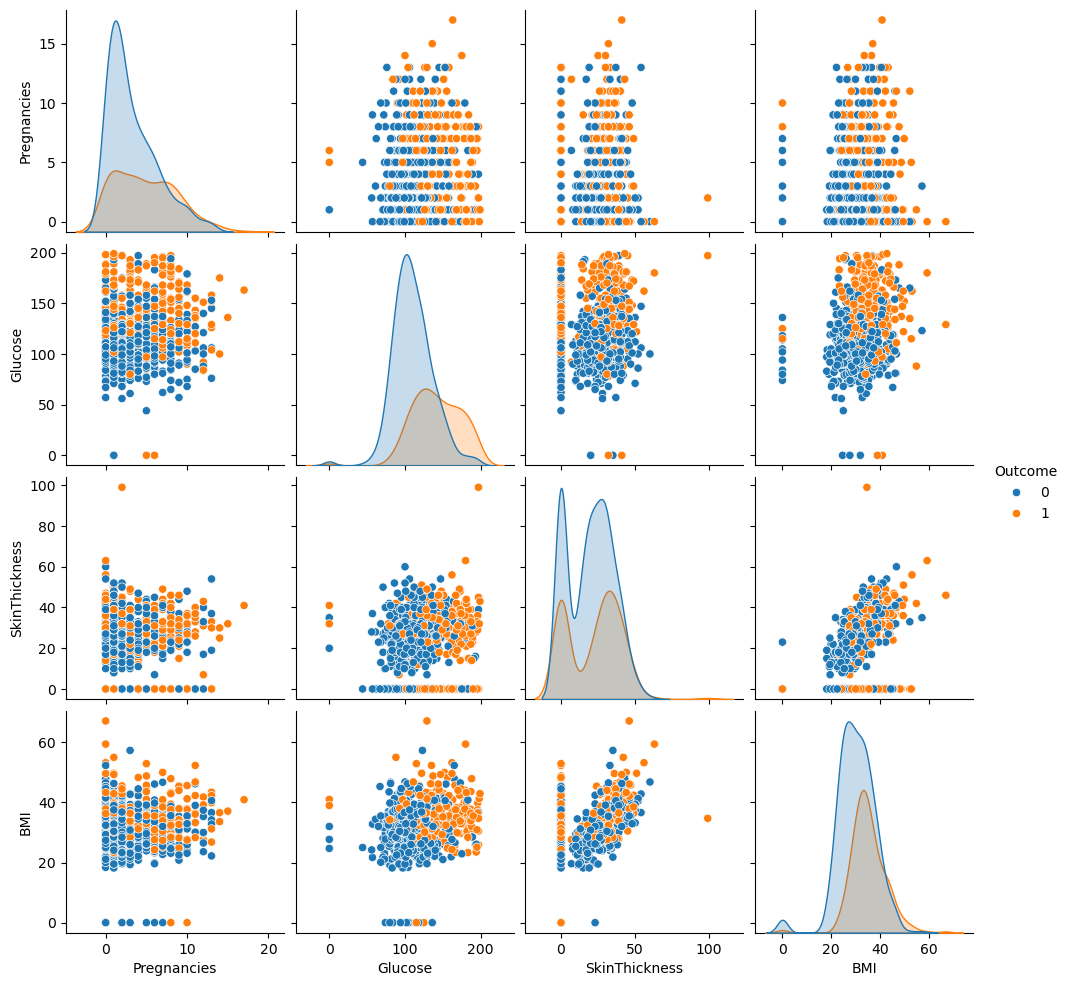

In [15]:
# pairplot을 이용해 여러 컬럼 간 상관관계 살펴보기 

sns.pairplot(df, vars=['Pregnancies', 'Glucose', 'SkinThickness','BMI'], hue='Outcome') 
plt.show()

C:\Users\tansy\AppData\Local\Temp\ipykernel_10420\3316058608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pregnancies", data=df, palette="Set3")


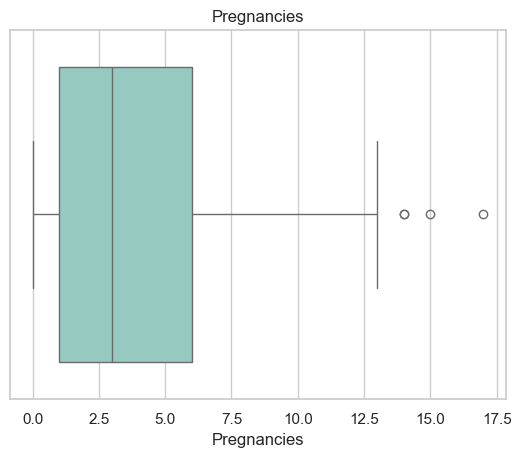

In [5]:
# 특정 칼럼의 범위 확인 및 outlier 확인 
sns.set_theme(style="whitegrid")
sns.boxplot(x="Pregnancies", data=df, palette="Set3")
plt.title("Pregnancies")
plt.show()

C:\Users\tansy\AppData\Local\Temp\ipykernel_9020\3763923896.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


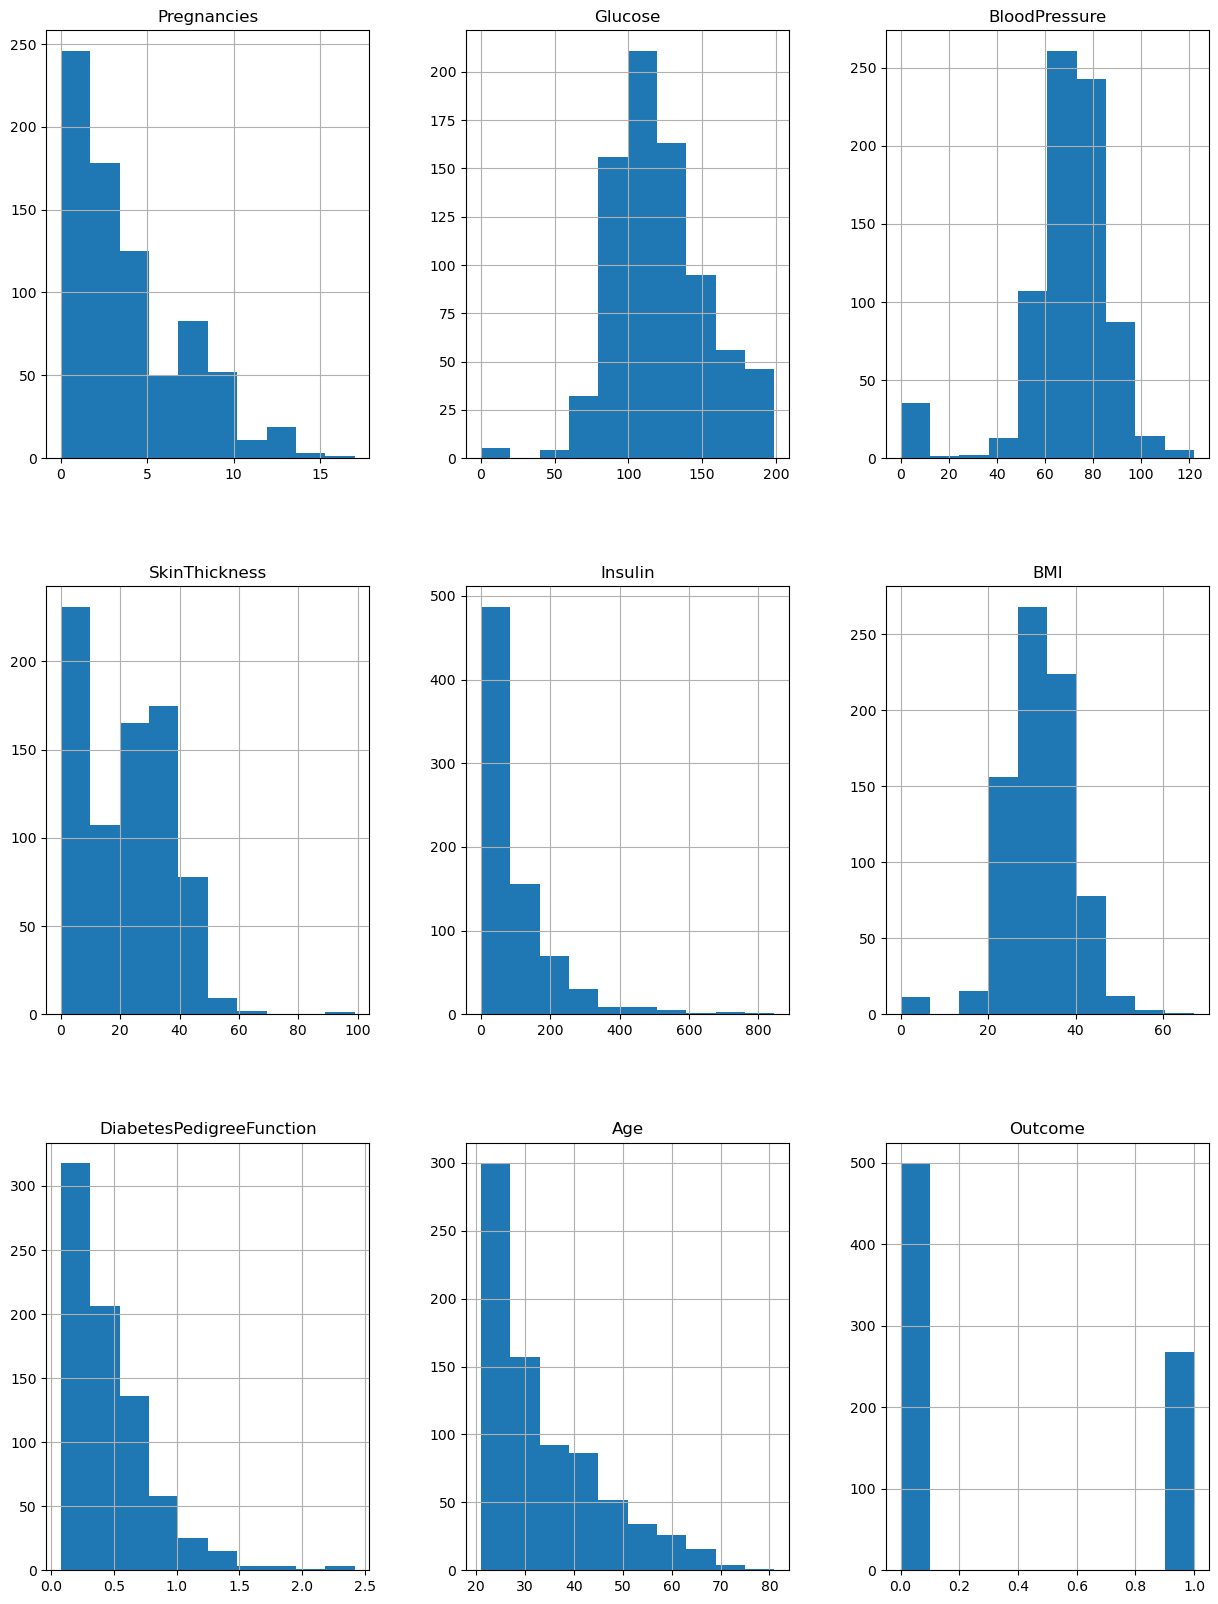

In [6]:
# 각 컬럼별 히스토그램 확인 

fig = plt.figure(figsize = (15,20)) 
ax = fig.gca() 
df.hist(ax = ax) 
plt.show() 

# 1. 훈련 데이터 준비 

In [6]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y = df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# ★ 이진 분류 문제에선 원 핫 인코딩으로 변환하면 안됨(출력층이 1개이기 때문) 

## 원 핫 인코딩

In [42]:
Y = pd.get_dummies(y).values
print(Y)

[[False  True]
 [ True False]
 [False  True]
 ...
 [ True False]
 [False  True]
 [ True False]]


## 원 핫 인코딩 => 숫자로 변환 방법 

In [43]:
Y = np.argmax(Y, axis=1) # 0 과 1의 숫자로 다시 변환 

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## 딥러닝 입력을 위해 Numpy로 변환

In [7]:
X = X.values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

# ※이진, 다중 분류 출력,컴파일 구분 

## 이진분류 : 출력층 (1, sigmoid) , loss='binary_crossentropy', optimizer=Adam()
## 다중 분류 : 출력층 (n, softmax) , Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy']
##           : 레이블이 정수값일때는 'sparse_categorical_crossentropy' 

## 특징 개수를 input_shape에 넣기

In [45]:
input_dim  = X.shape[1]
print(input_dim) 

8


## 2. 모델 구축 

In [49]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential() 

model.add(Dense(10, input_shape= (input_dim,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(), 'binary_crossentropy', metrics=['accuracy']) # 정확도 지표 accuracy(분류) <=> mse(회귀) 

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239 (956.00 B)

 Trainable params: 239 (956.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. 훈련

In [50]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# 예측값을 이진값으로 변환 (0 또는 1로 )
y_pred_class = (y_pred > 0.5).astype(int)

# y_test_class = np.argmax(y_test,axis=1)  다중 분류 문제에서 원 - 핫 인코딩 => 숫자로 바꾸는 방법임 
# y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.3793 - loss: 0.8754 - val_accuracy: 0.3117 - val_loss: 0.8448
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3523 - loss: 0.8030 - val_accuracy: 0.4091 - val_loss: 0.7505
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4698 - loss: 0.7225 - val_accuracy: 0.5195 - val_loss: 0.6881
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5314 - loss: 0.6856 - val_accuracy: 0.7143 - val_loss: 0.6453
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6293 - loss: 0.6675 - val_accuracy: 0.6948 - val_loss: 0.6193
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6311 - loss: 0.6478 - val_accuracy: 0.6948 - val_loss: 0.6056
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6586 - loss: 0.6285 - val_accuracy: 0.6948 - val_loss: 0.5982
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6448 - loss: 0.6302 - val_accuracy: 0.6948 - val_l

## 4. 모델 평가( 분류는 혼동 행렬, 회귀는 산점도로 모델 평가) 

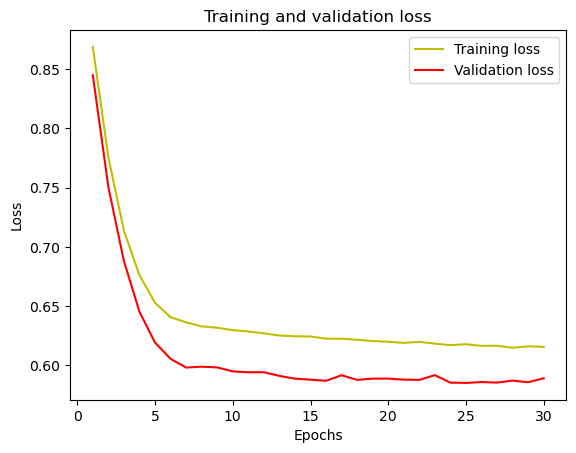

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

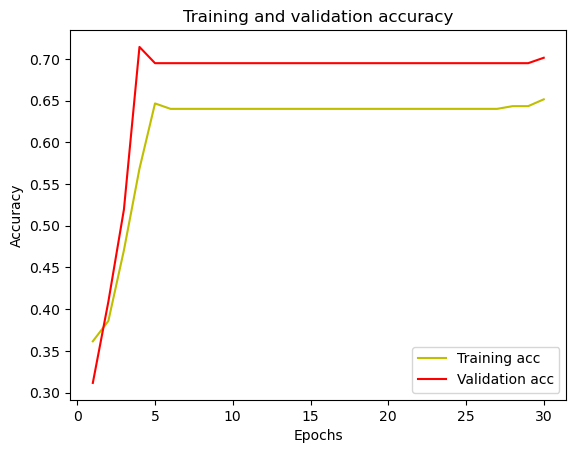

In [52]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## classification_report 및 혼동 행렬로 모델 평가

In [58]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

# 이진 분류 모델의 성능 평가 
# precision(클래스별 정확도), recall,f1-score(재현율, 균형), support(샘플 개수) 
print(classification_report(y_test,y_pred_class))


print(confusion_matrix(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       107
           1       1.00      0.02      0.04        47

    accuracy                           0.70       154
   macro avg       0.85      0.51      0.43       154
weighted avg       0.79      0.70      0.58       154

[[107   0]
 [ 46   1]]


## => 당뇨병 없는 샘플은 잘 분류하지만 당뇨병 있는 샘플을 잘 판별하지 못함 : 클래스 간 불균형이 심하다.(안 좋은 모델) 